In [117]:
import pandas as pd
from datetime import datetime as dt
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [83]:
df=pd.read_csv("Medical_appointment.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903.0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589980e+14,5642503.0,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262960e+12,5642549.0,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679510e+11,5642828.0,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841190e+12,5642494.0,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [84]:
df.shape

(10977, 14)

In [85]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
PatientId,10977.0,1.557759e+14,2.667815e+14,1.17,4.448350e+12,3.211430e+13,9.495530e+13,9.999350e+14
AppointmentID,10976.0,5.648150e+06,6.619355e+04,5030230.00,5.624364e+06,5.652614e+06,5.694876e+06,5.754683e+06
Age,10976.0,3.768468e+01,2.206544e+01,0.00,1.900000e+01,3.800000e+01,5.500000e+01,9.800000e+01
Scholarship,10976.0,8.764577e-02,2.827919e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,10976.0,1.950620e-01,3.962664e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,10976.0,6.395773e-02,2.446888e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,10976.0,5.867347e-02,2.350232e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,10976.0,2.141035e-02,1.556729e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
SMS_received,10976.0,3.187864e-01,4.660273e-01,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [86]:
df.describe(include="O").T

,count,unique,top,freq
Gender,10976,2,F,6452
ScheduledDay,10976,10692,2016-05-03T07:52:31Z,14
AppointmentDay,10976,20,2016-04-29T00:00:00Z,3235
Neighbourhood,10976,78,RESISTÊNCIA,916
No-show,10976,2,No,8760


**Data Prerocessing**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10977 entries, 0 to 10976
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       10977 non-null  float64
 1   AppointmentID   10976 non-null  float64
 2   Gender          10976 non-null  object 
 3   ScheduledDay    10976 non-null  object 
 4   AppointmentDay  10976 non-null  object 
 5   Age             10976 non-null  float64
 6   Neighbourhood   10976 non-null  object 
 7   Scholarship     10976 non-null  float64
 8   Hipertension    10976 non-null  float64
 9   Diabetes        10976 non-null  float64
 10  Alcoholism      10976 non-null  float64
 11  Handcap         10976 non-null  float64
 12  SMS_received    10976 non-null  float64
 13  No-show         10976 non-null  object 
dtypes: float64(9), object(5)
memory usage: 1.2+ MB


In [88]:
df.dtypes

,0
PatientId,float64
AppointmentID,float64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,float64
Neighbourhood,object
Scholarship,float64
Hipertension,float64
Diabetes,float64


Splitting Date and Time of scheduledDay and appointmentDay

In [89]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors='coerce')

In [91]:
df['ScheduledDate'] = df['ScheduledDay'].dt.date
df['ScheduledTime'] = df['ScheduledDay'].dt.time

In [92]:
df = df.drop(columns=['ScheduledDay'])

In [93]:
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'],errors='coerce')
df['AppointmentDate']=df['AppointmentDay'].dt.date
df['AppointmentTime']=df['AppointmentDay'].dt.time
df=df.drop(columns=['AppointmentDay'])

In [95]:
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,ScheduledTime,AppointmentDate,AppointmentTime
0,2.987250e+13,5642903.0,F,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No,2016-04-29,18:38:08,2016-04-29,00:00:00
1,5.589980e+14,5642503.0,M,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No,2016-04-29,16:08:27,2016-04-29,00:00:00
2,4.262960e+12,5642549.0,F,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No,2016-04-29,16:19:04,2016-04-29,00:00:00
3,8.679510e+11,5642828.0,F,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No,2016-04-29,17:29:31,2016-04-29,00:00:00
4,8.841190e+12,5642494.0,F,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No,2016-04-29,16:07:23,2016-04-29,00:00:00


In [96]:
df.isnull().sum()

,0
PatientId,0
AppointmentID,1
Gender,1
Age,1
Neighbourhood,1
Scholarship,1
Hipertension,1
Diabetes,1
Alcoholism,1
Handcap,1


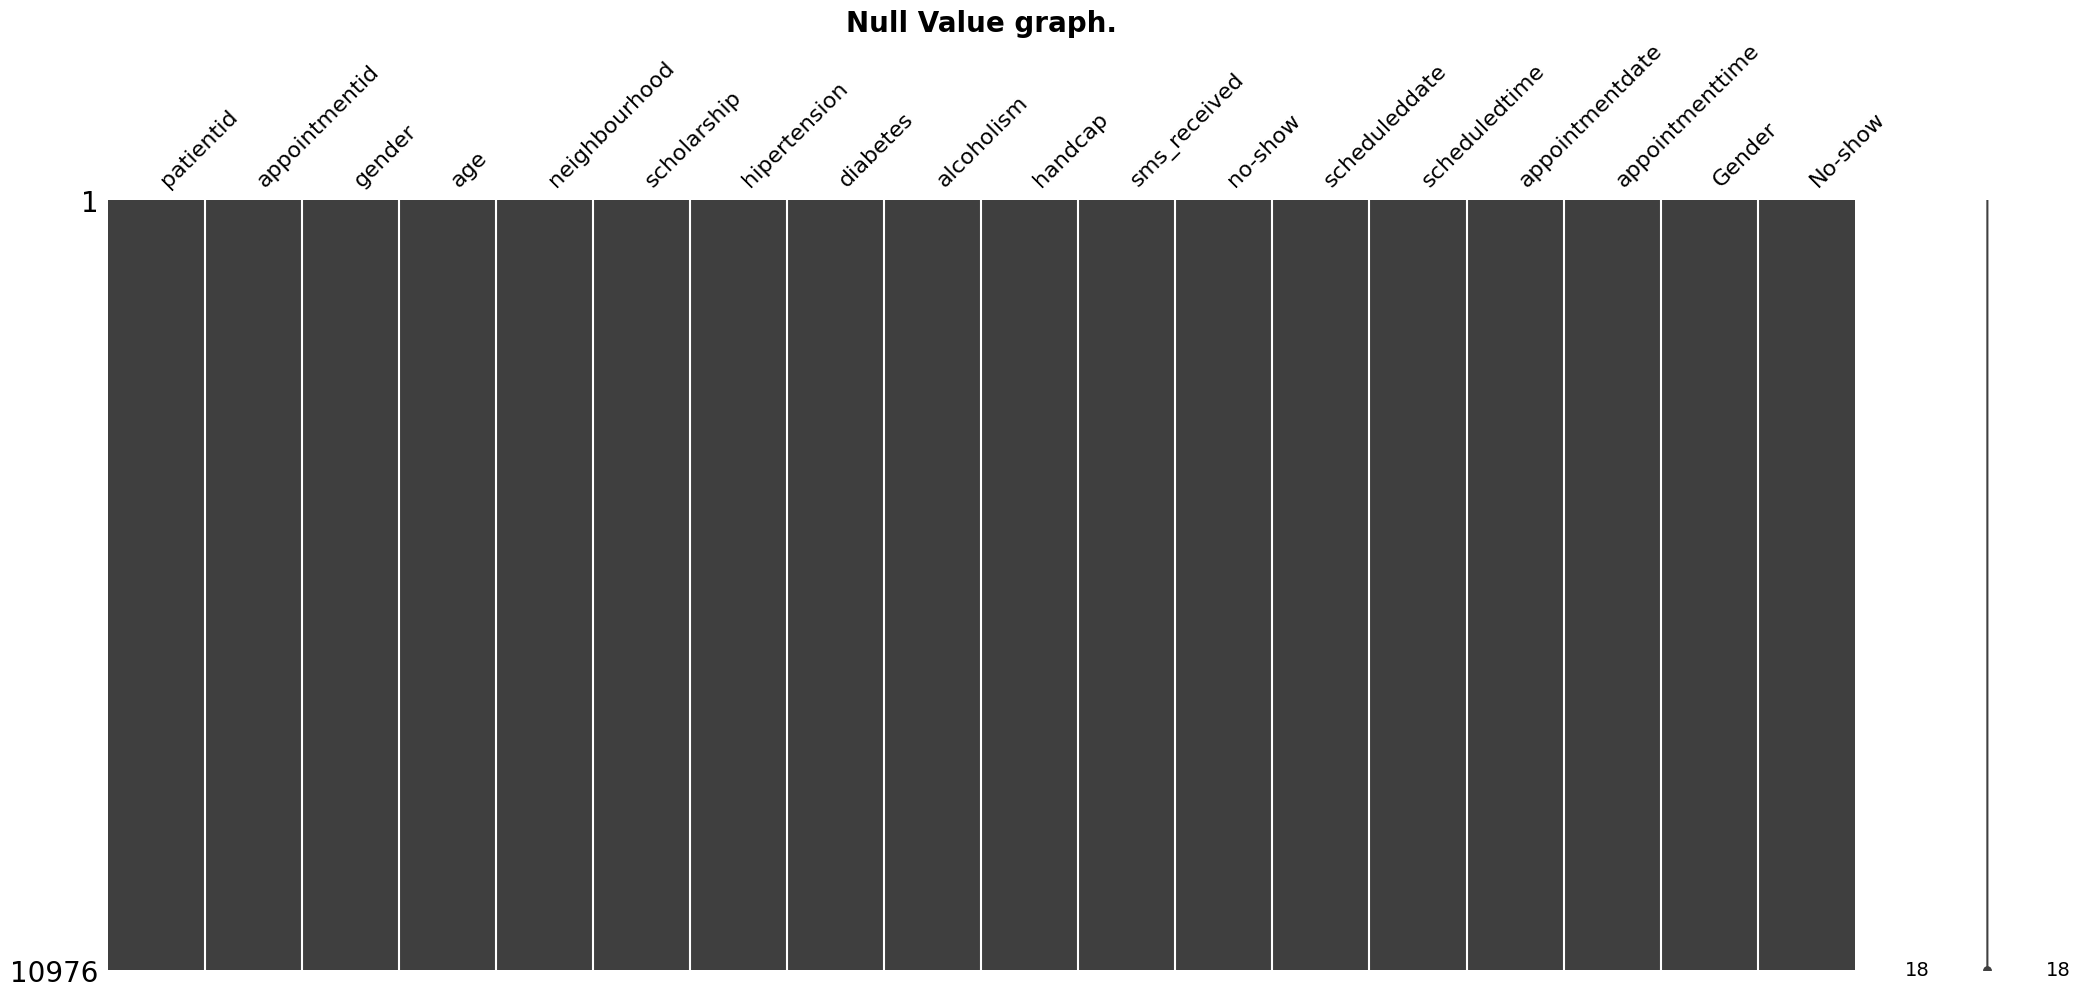

In [118]:
msno.matrix(df)
plt.title("Null Value graph.", fontsize=20, weight="bold")
plt.show()

As one row is null in the dataset, Dropped that row

In [97]:
df=df.dropna()

In [98]:
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0
Alcoholism,0
Handcap,0


In [99]:
df.duplicated().sum()

np.int64(0)

No duplicate values were found

In [100]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

This makes your column names cleaner, uniform, and easier to work .
- cuts the white space For example "  Age " -> "Age"
- Converts all column names to lowercase. "Age" → "age"
- Replaces all spaces in column names with underscores
   For example "appointment day" → "appointment_day"

In [101]:
df.dtypes

,0
patientid,float64
appointmentid,float64
gender,object
age,float64
neighbourhood,object
scholarship,float64
hipertension,float64
diabetes,float64
alcoholism,float64
handcap,float64


Standadizing the gender and no-show columns

In [102]:
df['Gender'] = df['gender'].str.upper().str.strip()
df['No-show'] = df['no-show'].str.upper().str.strip()

Changing the necessary datatypes

In [113]:
print(f"num of unique value in gender : {df['gender'].nunique()}")
print(f"num of unique value in No-show : {df['no-show'].nunique()}")

num of unique value in gender : 2
num of unique value in No-show : 2


In [106]:
df = df.astype({
    'patientid': 'str',
    'appointmentid': 'str',
    'gender': 'category',
    'age': 'int',
    'scholarship': 'int',
    'hipertension': 'int',
    'diabetes': 'int',
    'alcoholism': 'int',
    'handcap': 'int',
    'sms_received': 'int',
    'no-show': 'category',
    'appointmentdate': 'datetime64[ns]',
    'scheduleddate': 'datetime64[ns]',

})

In [107]:
df.dtypes

,0
patientid,object
appointmentid,object
gender,category
age,int64
neighbourhood,object
scholarship,int64
hipertension,int64
diabetes,int64
alcoholism,int64
handcap,int64


Cleaned and Preprocessed data

In [80]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,Gender,No-show
0,29872500000000.0,5642903.0,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,F,NO
1,558998000000000.0,5642503.0,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,M,NO
2,4262960000000.0,5642549.0,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,F,NO
3,867951000000.0,5642828.0,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,F,NO
4,8841190000000.0,5642494.0,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,F,NO


In [108]:
df.to_excel('output.xlsx', index=False)